In [1]:
import sys

sys.path.append('../../')

# from metaheuristics import DifferentialEvolution
import src.config as config
import src.utils as utils
import src.agents as agents
# from src.metaheuristics import DifferentialEvolution

import src.synergy as synergy

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from src.synergy import Synergy

## Example 1: Just 1 Metaheuristic

Fitness function:

$f(X) = \sum_{i=1}^{n}[x_i^2 - 10 cos (2 \pi x_i) + 10]$

$-5.12 \leq x_i \leq 5.12, i = 1, 2, ..., n$

where $n$ is the number of dimensions, here $n=10$.

$f_{min}(X*) = 0$

$x_i^* = 0$

### Differential Evolution on its own

Such instance will run for $2000$ iterations

In [3]:
# Instantiate a new Differential Evolution algorithm.

# Check https://www.semanticscholar.org/paper/Good-Parameters-for-Differential-Evolution-Pedersen/48aa36e1496c56904f9f6dfc15323e0c45e34a4c

from src.metaheuristics import DifferentialEvolution

diff_weight = np.float32(0.9426)
cr_rate = np.float32(0.6607)
n_population = np.int32(28)

de = DifferentialEvolution(
    search=config.search,
    population_size=n_population,
    diff_weight=diff_weight,
    crossover_rate=cr_rate
)

# Run the algorithm for N iterations.
n_iterations = np.int32(2*1e3)

synergy = Synergy(
    metaheuristics=[de],
    search=config.search,
    runs=1,  # equivalent to run DE for n_iterations
    iterations=n_iterations,
    convergence_criteria=0,  # don't converge
)

de_st = synergy.optimize()

# Get the best agent.
best_agent = synergy.best_agent

# Print the best agent.
print(f'Best agent: {best_agent} @ position {best_agent.position} with fitness {best_agent.fitness}')


Best agent: Agent -1 @ position [ 2.19311115e-06 -1.72937752e-06 -5.69119411e-07  6.77691211e-07
  5.82340950e-07  5.81410614e-07 -1.12948569e-07 -3.38397047e-07
  1.75695966e-06 -2.49862280e-07] with fitness 2.4873235511188585e-09


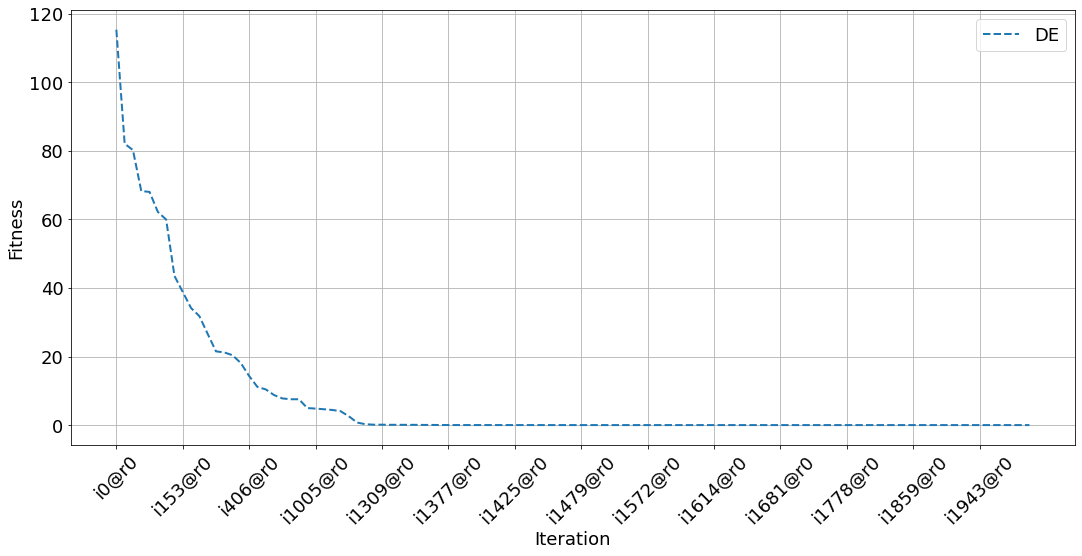

In [51]:
# Plot the evolution of the best agents' fitness over time for each metaheuristic.

fig, ax = plt.subplots(1, 1, figsize=(18, 8))

de_ft_trace = np.array([t['fitness'] for t in de_st['trace'].trace])
de_xpos_trace = [f'i{t["iteration"]}@r{t["run"]}' for t in de_st['trace'].trace]

ax.plot(de_ft_trace, label='DE', linestyle='--', linewidth=2)

ax.legend(loc='best', fontsize=18)
ax.grid(True)
ax.set_xlabel('Iteration', fontsize=18)
ax.set_ylabel('Fitness', fontsize=18)

# Set x ticks with de_xpos_trace.
ax.set_xticks(np.arange(len(de_xpos_trace)))

# Set x ticks labels.
ax.set_xticklabels(de_xpos_trace, rotation=45)

# Limit the number of x ticks.
ax.locator_params(axis='x', nbins=15)

# Big font size.
ax.tick_params(axis='both', which='major', labelsize=18)

fig.savefig('de.png', dpi=300)

## Example 2: many metaheuristics combined

$1$ ABC, $1$ WCA, $1$ PSO, $1$ DE

Fitness function:

$f(X) = \sum_{i=1}^{n}[x_i^2 - 10 cos (2 \pi x_i) + 10]$

$-5.12 \leq x_i \leq 5.12, i = 1, 2, ..., n$

where $n$ is the number of dimensions, here $n=5$.

$f_{min}(X*) = 0$

$x_i^* = 0$

In [42]:
from src.metaheuristics import ArtificialBeeColony, WaterCycleAlgorithm, ParticleSwarmOptimization

# See https://www.semanticscholar.org/paper/Good-Parameters-for-Differential-Evolution-Pedersen/48aa36e1496c56904f9f6dfc15323e0c45e34a4c

diff_weight = np.float32(0.9426)
cr_rate = np.float32(0.6607)
n_population = np.int32(28)

de = DifferentialEvolution(
    search=config.search,
    population_size=n_population,
    diff_weight=diff_weight,
    crossover_rate=cr_rate
)

# Check https://www.researchgate.net/profile/Mohamed_Mourad_Lafifi/post/Which-is-the-best-swarm-size-in-PSO/attachment/5b5b6f85b53d2f89289c14e1/AS%3A653084896288769%401532718981208/download/Good+Parameters+for+Particle+Swarm+Optimization.pdf

inertia = np.float32(0.7298)
cognitive = np.float32(1.4962)
social = np.float32(1.4962)

pso = ParticleSwarmOptimization(
    search=config.search,
    population_size=n_population,
    inertia=inertia,
    cognitive=cognitive,
    social=social
)

# See https://www.sciencedirect.com/science/article/pii/S0141029617315493

abc = ArtificialBeeColony(
    search=config.search,
    population_size=np.int32(25),
    max_trials=np.int32(100),  # paper
)

# See https://www.sciencedirect.com/science/article/pii/S1568494614005791?via%3Dihub

wca = WaterCycleAlgorithm(
    search=config.search,
    population_size=np.int32(25),
    max_iters=np.int32(1e3),
    n_sr=np.int32(5),  # paper, small rivers + sea proportionally to population size
    d_max=np.float32(1e-4),  # paper
)

# Run the algorithm for N iterations.
n_iterations = np.int32(2000)

synergy = Synergy(
    metaheuristics=[de, pso, abc, wca],
    search=config.search,
    runs=20,  # 10 times they'll share its best agent
    iterations=n_iterations,
    convergence_criteria=0,  # don't converge  --> run 10 times
)

# Call the synergy metaheuristic.
synergy_2_st = synergy.optimize()

# Get the best agent.
best_agent = synergy.best_agent

# print the best agent.
print(f'Best agent: {best_agent} @ position {best_agent.position} with fitness {best_agent.fitness}')

Best agent: Agent -1 @ position [ 0.03081032  0.03732762 -0.01214826 -0.00316677  0.02901614 -0.01253939
  0.02281058 -0.01206419 -0.01068893  0.0360204 ] with fitness 1.102810015732039


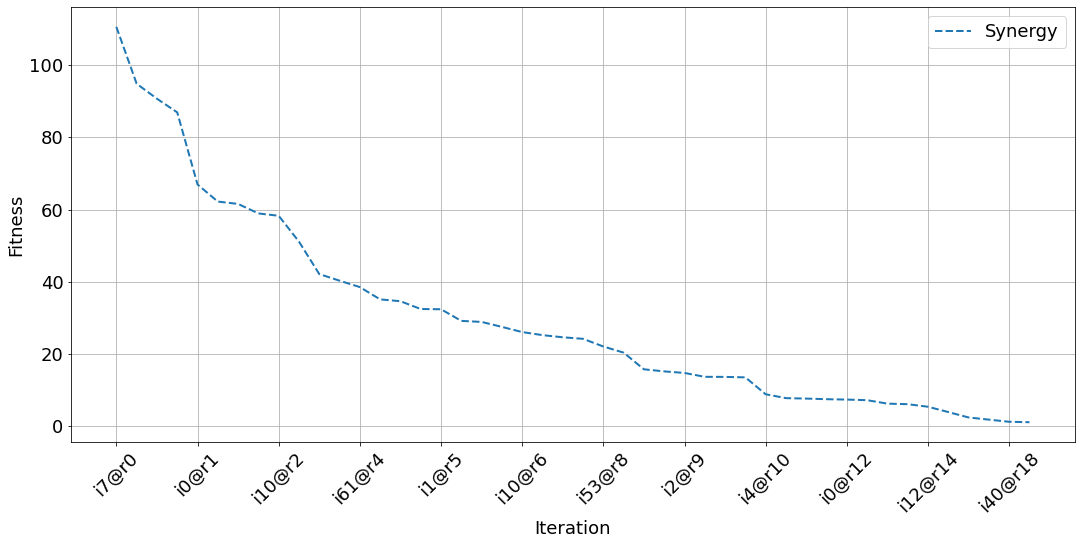

In [52]:
# Plot the evolution of the best agents' fitness over time for each metaheuristic.

fig, ax = plt.subplots(1, 1, figsize=(18, 8))

synergy_2_ft_trace = np.array([t['fitness'] for t in synergy_2_st['trace'].trace])
synergy_2_xpos_trace = [f'i{t["iteration"]}@r{t["run"]}' for t in synergy_2_st['trace'].trace]

# ax.plot(de_ft_trace, label='DE', linestyle='--', linewidth=2)
ax.plot(synergy_2_ft_trace, label='Synergy', linestyle='--', linewidth=2)

ax.legend(loc='best', fontsize=18)
ax.grid(True)
ax.set_xlabel('Iteration', fontsize=18)
ax.set_ylabel('Fitness', fontsize=18)

# Set x ticks with de_xpos_trace.
ax.set_xticks(np.arange(len(synergy_2_xpos_trace)))

# Set x ticks labels.
ax.set_xticklabels(synergy_2_xpos_trace, rotation=45)

# Limit the number of x ticks.
ax.locator_params(axis='x', nbins=15)

# Big font size.
ax.tick_params(axis='both', which='major', labelsize=18)

fig.savefig('synergy_2.png', dpi=300)